In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense, Input, Dropout, BatchNormalization, LSTM, GRU

In [50]:
N = 100
X = pd.DataFrame({'a' : [np.random.randint(N) for i in range(N)], 'b' : [np.random.randint(N) for i in range(N)]})

In [51]:
X.head()

,a,b
0,61,93
1,16,68
2,7,32
3,9,38
4,43,71


In [52]:
y = X['a'] + X['b']

In [67]:
y

0     154
1      84
2      39
3      47
4     114
     ... 
95     42
96     92
97    127
98    140
99    100
Length: 100, dtype: int64

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X = scaler.fit_transform(X)

In [156]:
model = keras.Sequential()

model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [157]:
history = model.fit(X,y,epochs=100, batch_size=8, verbose=0, validation_split = 0.1)

In [158]:
pd.DataFrame(history.history)

,loss,val_loss
0,9225.282227,2485.075928
1,1129.662476,968.629089
2,798.111023,390.536591
3,270.457306,210.367844
4,117.823402,30.870686
...,...,...
95,0.001090,0.000178
96,0.000396,0.000243
97,0.000464,0.000672
98,0.000542,0.000342


<AxesSubplot:>

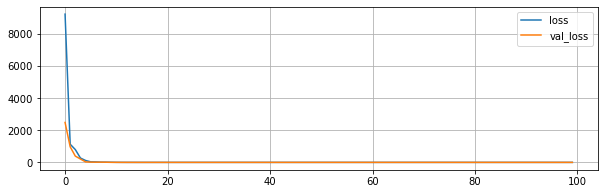

In [159]:
pd.DataFrame(history.history).plot(figsize=(10,3), grid=True)

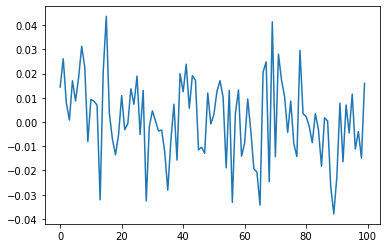

In [160]:
plt.plot(model(X).numpy().reshape(-1) - y)

In [161]:
model(X)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[154.01442 ],
       [ 84.02608 ],
       [ 39.007923],
       [ 47.000786],
       [114.01702 ],
       [ 17.008642],
       [184.01834 ],
       [185.03125 ],
       [180.0226  ],
       [102.99196 ]], dtype=float32)>

In [162]:
y[:10]

0    154
1     84
2     39
3     47
4    114
5     17
6    184
7    185
8    180
9    103
dtype: int64